# import libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings; warnings.simplefilter('ignore')

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import SimpleRNN, LSTM, GRU, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import SimpleRNN, LSTM, GRU, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [2]:
# initialize file names
f1 = 'dataset1.csv' # 
f2 = 'dataset2.csv' #
f3 = 'dataset3.csv' #

# initialize dataframes: all empty
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

files_list = [f1, f2, f3]

# Function use to split and sample the data (can be skipped when running)

In [8]:
#f2 = './datasets/test.ft.txt' 
df2 = pd.read_csv(f2, sep='\t', header=None,dtype=str,keep_default_na=False)

# split column 0 into two columns
df2 = df2.apply(lambda x: x[0].split(' ', 1), axis=1, result_type='expand')

# add column names
columns = ['label', 'text']
df2.columns = columns
# Split the data based on 'label' and sample 'sample_size' number of rows from each class 
sample_size = 5000
# Split the data based on 'class_index' and sample 'sample_size' number of rows from each class 
label_1_df2 = df2[df2['label'] == '__label__1']
label_2_df2 = df2[df2['label'] == '__label__2']
sampled_df2 = pd.concat([label_1_df2.sample(sample_size), label_2_df2.sample(sample_size)])
sampled_df2.to_csv('./dataset-csv-files/dataset2.csv', index=False, header=True)

# funcation to load in df

In [3]:
# initialize dataframes: all empty
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

files_list = [f1, f2, f3]

def load_df(fname, df, name):
  file_path = 'dataset-csv-files/' + fname

  # Read the CSV file
  new_data = pd.read_csv(file_path)

  # If df is still empty, you can directly assign new_data to df
  if df.empty:
    df = new_data
  else:
    # Concatenate the new data with the existing DataFrame
    df = pd.concat([df, new_data], ignore_index=True)

  print(name + ' has loaded in.')
  #print(df.shape)
  #print(df.head())
  #print('\n')
  return df

df1 = load_df(f1, df1, 'df1')
df2 = load_df(f2, df2, 'df2')
df3 = load_df(f3, df3, 'df3')

df_list = [df1, df2, df3]

df1 has loaded in.
df2 has loaded in.
df3 has loaded in.


# map df values for datasets

In [4]:
# Dataset 1
df1_texts = df1['review_text'].values
df1_labels = df1['class_index'].map({1: 0, 2: 1}).values

# Dataset 2
df2_texts = df2['text'].values
df2_labels = df2['label'].map({'__label__2': 1, '__label__1': 0}).values.astype(int)

# Dataset 3
df3_texts = df3['reviewText'].astype(str).values # Your text data
df3_labels = df3['rating']

# Vanilla rnn

In [5]:
def VanillaRNN(df_texts, df_labels, name):
    vocab_size = 5000
    embd_len = 32

    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(df_texts)
    sequences = tokenizer.texts_to_sequences(df_texts)

    max_words = max(len(sequence) for sequence in sequences)
    x_data = pad_sequences(sequences, maxlen=max_words)

    x_temp, x_test, y_temp, y_test = train_test_split(x_data, df_labels, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)

    RNN_model = Sequential(name="Simple_RNN")
    RNN_model.add(Embedding(input_dim=vocab_size, output_dim=embd_len, input_length=max_words))
    RNN_model.add(SimpleRNN(128))
    RNN_model.add(Dense(1, activation='sigmoid'))

    RNN_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    history = RNN_model.fit(x_train, y_train, batch_size=64, epochs=11, verbose=1, validation_data=(x_valid.astype(int), y_valid.astype(int)))

    score = RNN_model.evaluate(x_test.astype(int), y_test.astype(int), verbose=0)
    print(f"\n{name} Vanilla RNN Score---> {score}")
    print()

    print(f'Visualize data for: {name}')

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Adam Vanilla RNN Model accuracy for {name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Adam Vanilla RNN Model loss for {name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# model training 

Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.5108 - loss: 0.6971 - val_accuracy: 0.5670 - val_loss: 0.6885
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5582 - loss: 0.6819 - val_accuracy: 0.5475 - val_loss: 0.6868
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5669 - loss: 0.6806 - val_accuracy: 0.5820 - val_loss: 0.6740
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.6371 - loss: 0.6534 - val_accuracy: 0.6010 - val_loss: 0.6632
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.7208 - loss: 0.5844 - val_accuracy: 0.6050 - val_loss: 0.6508
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.7640 - loss: 0.5096 - val_accuracy: 0.6360 - val_loss: 0.6694
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.8245 - loss: 0.4074 - val_accuracy: 0.7055 - val_loss: 0.6296
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.8695 - loss: 0.3157 - val_accuracy: 0.7030 - v

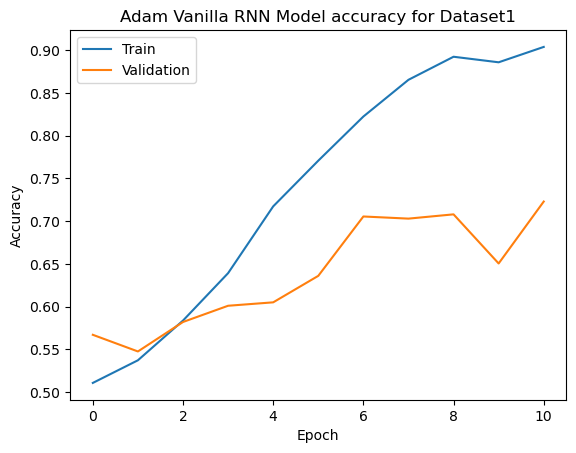

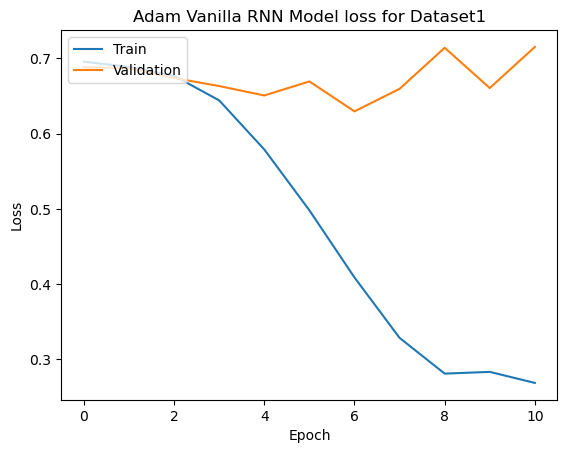

In [6]:
VanillaRNN(df1_texts, df1_labels, 'Dataset1')

Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.4979 - loss: 0.6982 - val_accuracy: 0.5515 - val_loss: 0.6880
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5610 - loss: 0.6874 - val_accuracy: 0.5260 - val_loss: 0.6848
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.6430 - loss: 0.6508 - val_accuracy: 0.5790 - val_loss: 0.6678
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.7290 - loss: 0.5720 - val_accuracy: 0.6030 - val_loss: 0.6602
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.7712 - loss: 0.4916 - val_accuracy: 0.7065 - val_loss: 0.5939
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.8554 - loss: 0.3427 - val_accuracy: 0.7535 - val_loss: 0.5535
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9160 - loss: 0.2257 - val_accuracy: 0.7635 - val_loss: 0.5989
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9612 - loss: 0.1306 - val_accuracy: 0.7505 - v

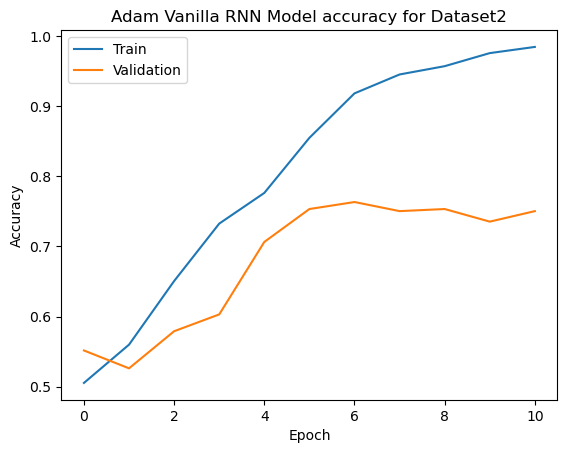

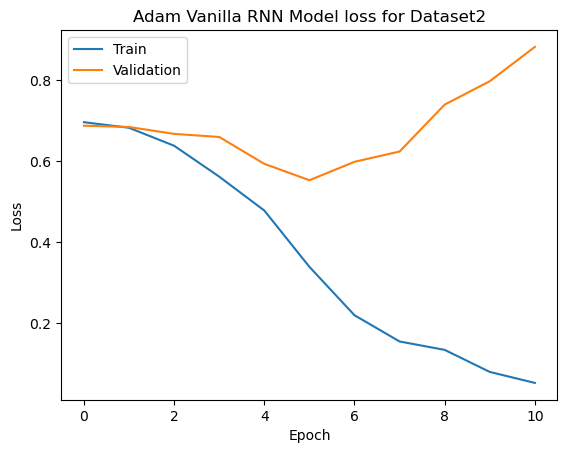

In [7]:
VanillaRNN(df2_texts, df2_labels, 'Dataset2')

In [8]:
VanillaRNN(df3_texts, df3_labels, 'Dataset3')

Epoch 1/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 63s 550ms/step - accuracy: 0.5172 - loss: 0.6933 - val_accuracy: 0.5400 - val_loss: 0.6802
Epoch 2/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 60s 532ms/step - accuracy: 0.6394 - loss: 0.6481 - val_accuracy: 0.4971 - val_loss: 0.7297
Epoch 3/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 61s 541ms/step - accuracy: 0.6321 - loss: 0.6500 - val_accuracy: 0.5600 - val_loss: 0.6739
Epoch 4/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 63s 560ms/step - accuracy: 0.6505 - loss: 0.6366 - val_accuracy: 0.5746 - val_loss: 0.6640
Epoch 5/11
  2/113 ━━━━━━━━━━━━━━━━━━━━ 58s 531ms/step - accuracy: 0.7266 - loss: 0.5932

# GRU

In [ ]:
def GRU_Model(df_texts, df_labels, name):
    vocab_size = 5000
    embd_len = 32

    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(df_texts)
    sequences = tokenizer.texts_to_sequences(df_texts)

    max_words = max(len(sequence) for sequence in sequences)
    x_data = pad_sequences(sequences, maxlen=max_words)

    x_train, x_test, y_train, y_test = train_test_split(x_data, df_labels, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

    gru_model = Sequential(name=f"GRU_{name}")
    gru_model.add(Embedding(input_dim=vocab_size, output_dim=embd_len, input_length=max_words))
    gru_model.add(GRU(128, activation='sigmoid', return_sequences=False))
    gru_model.add(Dense(1, activation='tanh'))

    gru_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    history = gru_model.fit(x_train, y_train, batch_size=64, epochs=11, verbose=1, validation_data=(x_valid, y_valid))

    score = gru_model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{name} GRU Model Score---> {score}")

    # Plot training & validation accuracy values
    plt.xlim(1, 10)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Adam GRU Model Accuracy for {name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.xlim(1, 10)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Adam GRU Model Loss for {name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.5284 - loss: 1.1484 - val_accuracy: 0.6845 - val_loss: 0.6111
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - accuracy: 0.7601 - loss: 0.5460 - val_accuracy: 0.6970 - val_loss: 0.6848
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - accuracy: 0.8405 - loss: 0.4626 - val_accuracy: 0.7290 - val_loss: 1.0731
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.8389 - loss: 0.4361 - val_accuracy: 0.7225 - val_loss: 1.2497
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 0.9064 - loss: 0.3270 - val_accuracy: 0.7195 - val_loss: 1.3216
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.9288 - loss: 0.2553 - val_accuracy: 0.7295 - val_loss: 1.4352
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.9593 - loss: 0.1892 - val_accuracy: 0.7330 - val_loss: 1.6776
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - accuracy: 0.9712 - loss: 0.1577 - val_accu

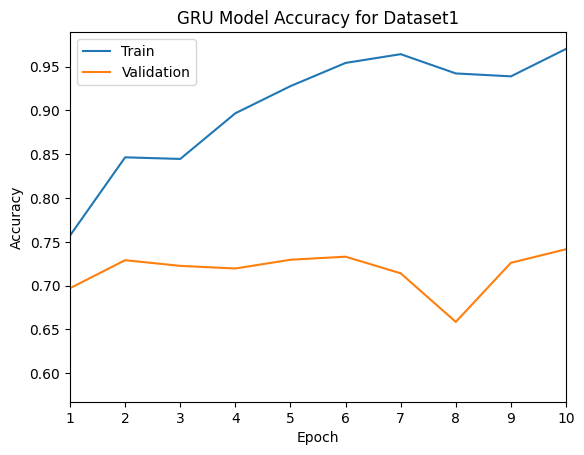

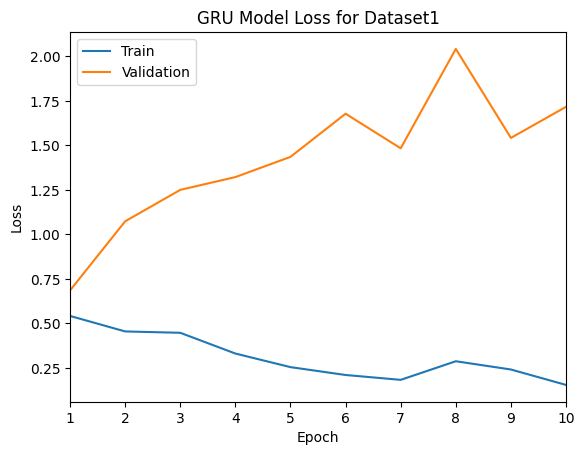

In [ ]:
GRU_Model(df1_texts, df1_labels, 'Dataset1')

Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.5655 - loss: 0.6720 - val_accuracy: 0.7370 - val_loss: 0.5360
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - accuracy: 0.7967 - loss: 0.4463 - val_accuracy: 0.8170 - val_loss: 0.4299
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.8816 - loss: 0.2809 - val_accuracy: 0.8460 - val_loss: 0.3880
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 143ms/step - accuracy: 0.9370 - loss: 0.1664 - val_accuracy: 0.8465 - val_loss: 0.4234
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - accuracy: 0.9631 - loss: 0.1081 - val_accuracy: 0.8380 - val_loss: 0.4736
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - accuracy: 0.9764 - loss: 0.0865 - val_accuracy: 0.8225 - val_loss: 0.5321
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step - accuracy: 0.9859 - loss: 0.0517 - val_accuracy: 0.8190 - val_loss: 0.6106
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - accuracy: 0.9870 - loss: 0.0466 - val_accu

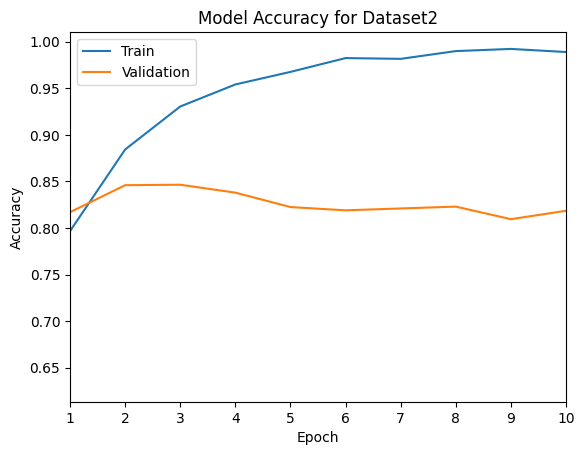

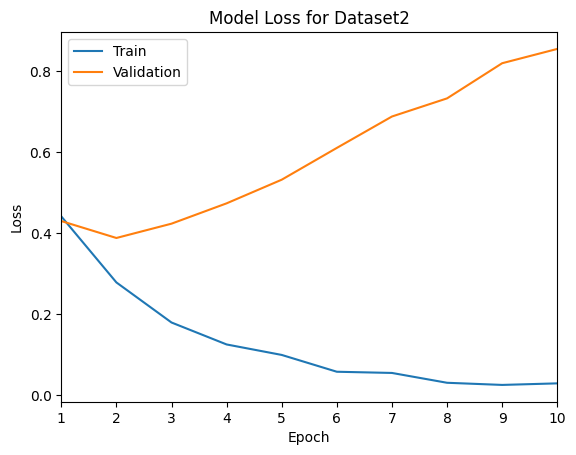

In [ ]:
GRU_Model(df2_texts, df2_labels, 'Dataset2')

Epoch 1/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 305s 3s/step - accuracy: 0.5736 - loss: 0.6805 - val_accuracy: 0.7604 - val_loss: 0.5058
Epoch 2/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 374s 3s/step - accuracy: 0.8123 - loss: 0.4153 - val_accuracy: 0.7871 - val_loss: 0.4570
Epoch 3/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 458s 4s/step - accuracy: 0.8723 - loss: 0.3111 - val_accuracy: 0.8108 - val_loss: 0.4281
Epoch 4/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 459s 4s/step - accuracy: 0.9067 - loss: 0.2428 - val_accuracy: 0.8042 - val_loss: 0.4672
Epoch 5/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9280 - loss: 0.1872 - val_accuracy: 0.8075 - val_loss: 0.5097
Epoch 6/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9456 - loss: 0.1545 - val_accuracy: 0.7967 - val_loss: 0.5732
Epoch 7/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.9523 - loss: 0.1399 - val_accuracy: 0.8037 - val_loss: 0.6263
Epoch 8/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 299s 3s/step - accuracy: 0.9660 - loss: 0.1080 - val_accu

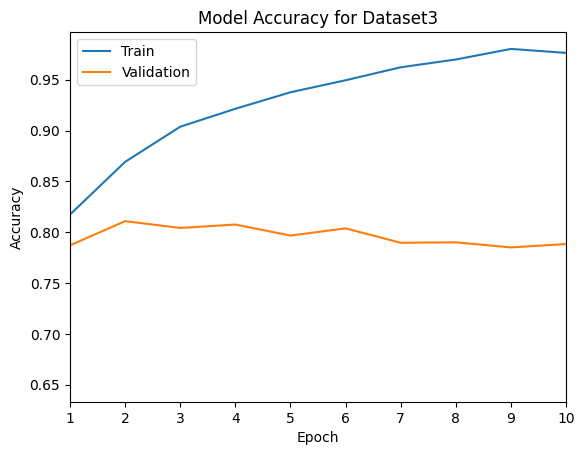

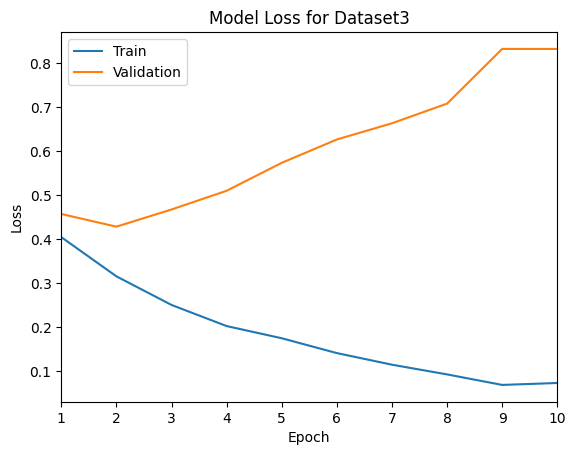

In [ ]:
GRU_Model(df3_texts, df3_labels, 'Dataset3')

# LSTM

In [ ]:
def LSTM_Model(df_texts, df_labels, name):
    vocab_size = 5000
    embd_len = 32

    # Tokenization and sequence padding
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(df_texts)
    sequences = tokenizer.texts_to_sequences(df_texts)

    max_words = max(len(sequence) for sequence in sequences)
    x_data = pad_sequences(sequences, maxlen=max_words)

    # Splitting the dataset into train, validation, and test sets
    x_train, x_test, y_train, y_test = train_test_split(x_data, df_labels, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

    # Defining the LSTM model
    lstm_model = Sequential(name=f"LSTM_{name}")
    lstm_model.add(Embedding(input_dim=vocab_size, output_dim=embd_len, input_length=max_words))
    lstm_model.add(LSTM(128, activation='tanh', return_sequences=False))
    lstm_model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    lstm_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    # Training the model
    history = lstm_model.fit(x_train, y_train, batch_size=64, epochs=11, verbose=2, validation_data=(x_valid, y_valid))

    # Evaluating the model
    score = lstm_model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{name} LSTM Model Score---> {score}")

    # Visualization of training and validation metrics
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Adam LSTM Model Accuracy for {name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Adam LSTM Model Loss for {name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# testing models

Epoch 1/11
94/94 - 14s - 152ms/step - accuracy: 0.6097 - loss: 0.6775 - val_accuracy: 0.7125 - val_loss: 0.5966
Epoch 2/11
94/94 - 13s - 139ms/step - accuracy: 0.7983 - loss: 0.4566 - val_accuracy: 0.7800 - val_loss: 0.4756
Epoch 3/11
94/94 - 13s - 137ms/step - accuracy: 0.8772 - loss: 0.3109 - val_accuracy: 0.7640 - val_loss: 0.4913
Epoch 4/11
94/94 - 13s - 136ms/step - accuracy: 0.9158 - loss: 0.2311 - val_accuracy: 0.8115 - val_loss: 0.4663
Epoch 5/11
94/94 - 13s - 137ms/step - accuracy: 0.9422 - loss: 0.1691 - val_accuracy: 0.8060 - val_loss: 0.5003
Epoch 6/11
94/94 - 13s - 139ms/step - accuracy: 0.9553 - loss: 0.1350 - val_accuracy: 0.7945 - val_loss: 0.7005
Epoch 7/11
94/94 - 13s - 134ms/step - accuracy: 0.9483 - loss: 0.1471 - val_accuracy: 0.7995 - val_loss: 0.6145
Epoch 8/11
94/94 - 12s - 132ms/step - accuracy: 0.9692 - loss: 0.0970 - val_accuracy: 0.7955 - val_loss: 0.6668
Epoch 9/11
94/94 - 12s - 132ms/step - accuracy: 0.9560 - loss: 0.1254 - val_accuracy: 0.7735 - val_loss:

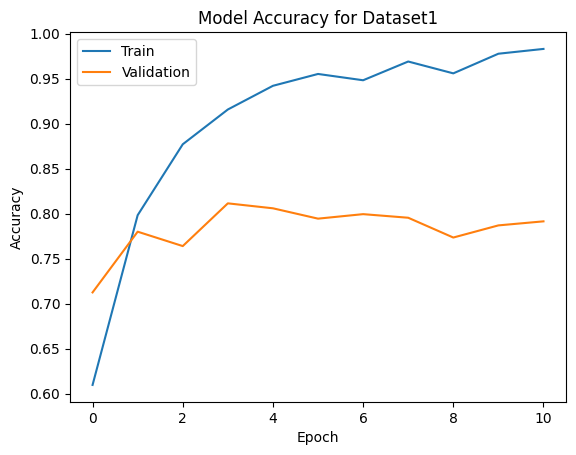

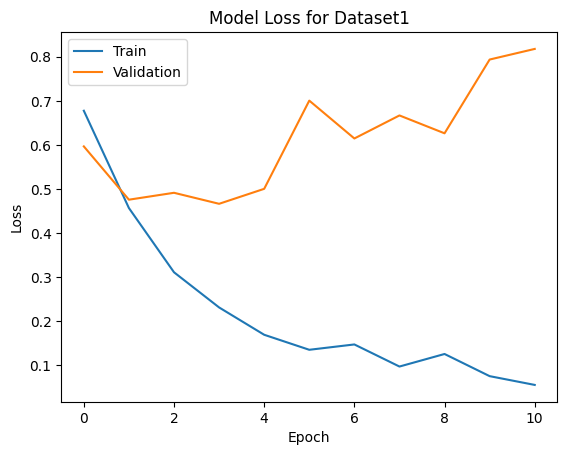

In [ ]:
LSTM_Model(df1_texts, df1_labels, 'Dataset1')

Epoch 1/11
94/94 - 15s - 154ms/step - accuracy: 0.6652 - loss: 0.5990 - val_accuracy: 0.8290 - val_loss: 0.3915
Epoch 2/11
94/94 - 13s - 140ms/step - accuracy: 0.8668 - loss: 0.3218 - val_accuracy: 0.8505 - val_loss: 0.3501
Epoch 3/11
94/94 - 13s - 140ms/step - accuracy: 0.9192 - loss: 0.2179 - val_accuracy: 0.8270 - val_loss: 0.3938
Epoch 4/11
94/94 - 13s - 142ms/step - accuracy: 0.9403 - loss: 0.1753 - val_accuracy: 0.8390 - val_loss: 0.4301
Epoch 5/11
94/94 - 14s - 146ms/step - accuracy: 0.9592 - loss: 0.1206 - val_accuracy: 0.8360 - val_loss: 0.4811
Epoch 6/11
94/94 - 14s - 145ms/step - accuracy: 0.9703 - loss: 0.0962 - val_accuracy: 0.8280 - val_loss: 0.5931
Epoch 7/11
94/94 - 14s - 145ms/step - accuracy: 0.9753 - loss: 0.0744 - val_accuracy: 0.8325 - val_loss: 0.5337
Epoch 8/11
94/94 - 14s - 145ms/step - accuracy: 0.9683 - loss: 0.0882 - val_accuracy: 0.8310 - val_loss: 0.5701
Epoch 9/11
94/94 - 14s - 146ms/step - accuracy: 0.9728 - loss: 0.0748 - val_accuracy: 0.8280 - val_loss:

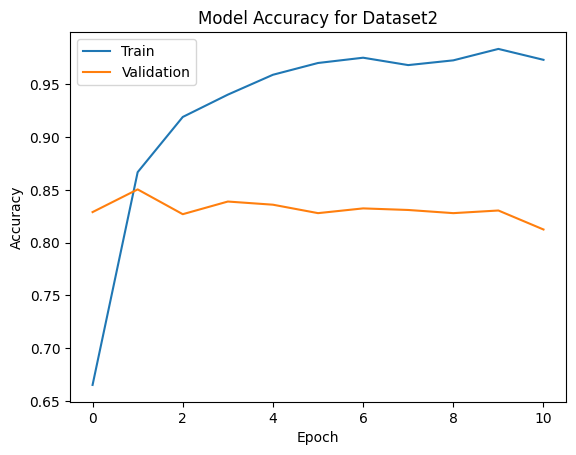

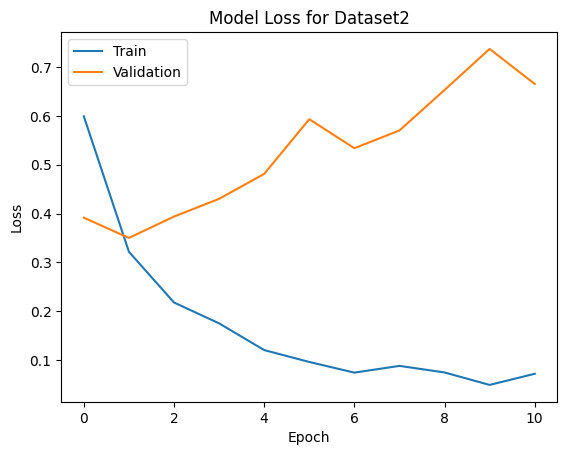

In [ ]:
LSTM_Model(df2_texts, df2_labels, 'Dataset2')

Epoch 1/11
113/113 - 159s - 1s/step - accuracy: 0.6914 - loss: 0.5833 - val_accuracy: 0.7733 - val_loss: 0.4881
Epoch 2/11
113/113 - 155s - 1s/step - accuracy: 0.8285 - loss: 0.4029 - val_accuracy: 0.8150 - val_loss: 0.4135
Epoch 3/11
113/113 - 157s - 1s/step - accuracy: 0.8640 - loss: 0.3326 - val_accuracy: 0.7996 - val_loss: 0.4370
Epoch 4/11
113/113 - 157s - 1s/step - accuracy: 0.8964 - loss: 0.2722 - val_accuracy: 0.8054 - val_loss: 0.4329
Epoch 5/11
113/113 - 155s - 1s/step - accuracy: 0.9187 - loss: 0.2227 - val_accuracy: 0.8017 - val_loss: 0.5029
Epoch 6/11
113/113 - 156s - 1s/step - accuracy: 0.9306 - loss: 0.1974 - val_accuracy: 0.8008 - val_loss: 0.5469
Epoch 7/11
113/113 - 156s - 1s/step - accuracy: 0.9396 - loss: 0.1755 - val_accuracy: 0.8021 - val_loss: 0.5234
Epoch 8/11
113/113 - 155s - 1s/step - accuracy: 0.9401 - loss: 0.1691 - val_accuracy: 0.7800 - val_loss: 0.5716
Epoch 9/11
113/113 - 155s - 1s/step - accuracy: 0.9450 - loss: 0.1601 - val_accuracy: 0.7858 - val_loss:

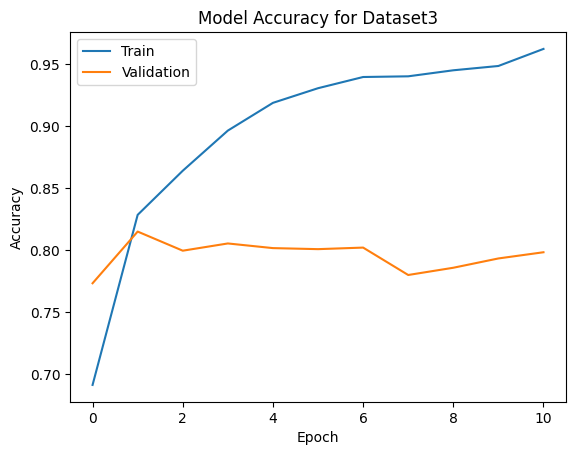

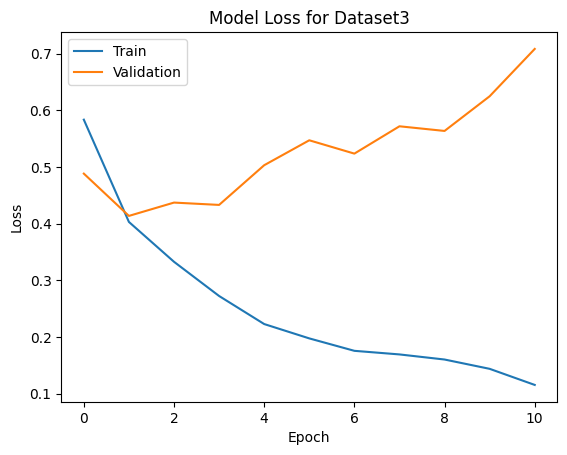

In [ ]:
LSTM_Model(df3_texts, df3_labels, 'Dataset3')